<a href="https://colab.research.google.com/github/MustafaYassinM/Data_science_projects/blob/main/Loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,10)
sns.set(style="darkgrid" )
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv ('/content/drive/MyDrive/Loan prediction')

In [5]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
382,LP002231,Female,No,0,Graduate,No,6000,0.0,156.0,360.0,1.0,Urban,Y
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
451,LP002447,Male,Yes,2,Not Graduate,No,1958,1456.0,60.0,300.0,NaN,Urban,Y
496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y


In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#fill categorical columns#
df ['Gender'] = df ['Gender'].fillna(df['Gender'].mode()[0])
df ['Married'] = df ['Married'].fillna(df['Married'].mode()[0])
df ['Dependents'] = df ['Dependents'].fillna(df['Dependents'].mode()[0])
df ['Self_Employed'] = df ['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [8]:
#fill numerical columns
df ['LoanAmount'] = df ['LoanAmount'].fillna(df['LoanAmount'].mean())
df ['Loan_Amount_Term'] = df ['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df ['Credit_History'] = df ['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

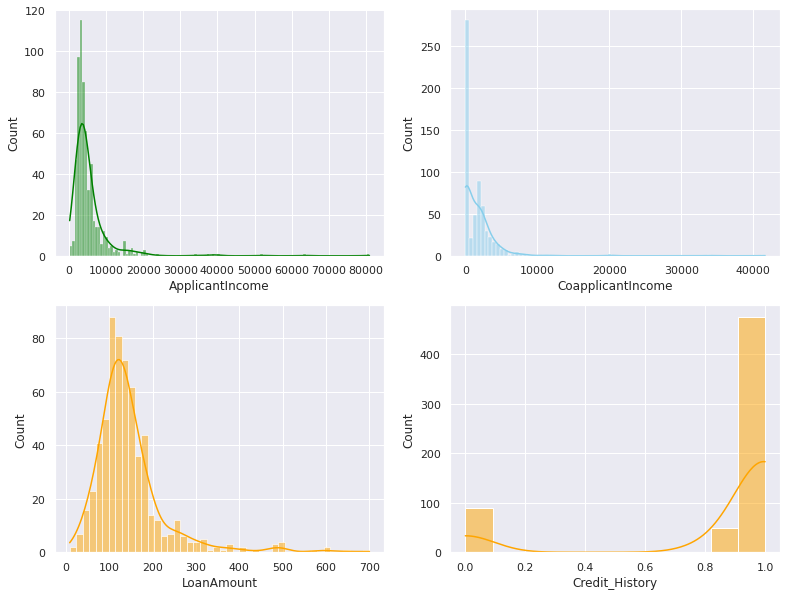

In [10]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(13, 10))
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="Credit_History", kde=True, ax=axs[1, 1], color='orange');

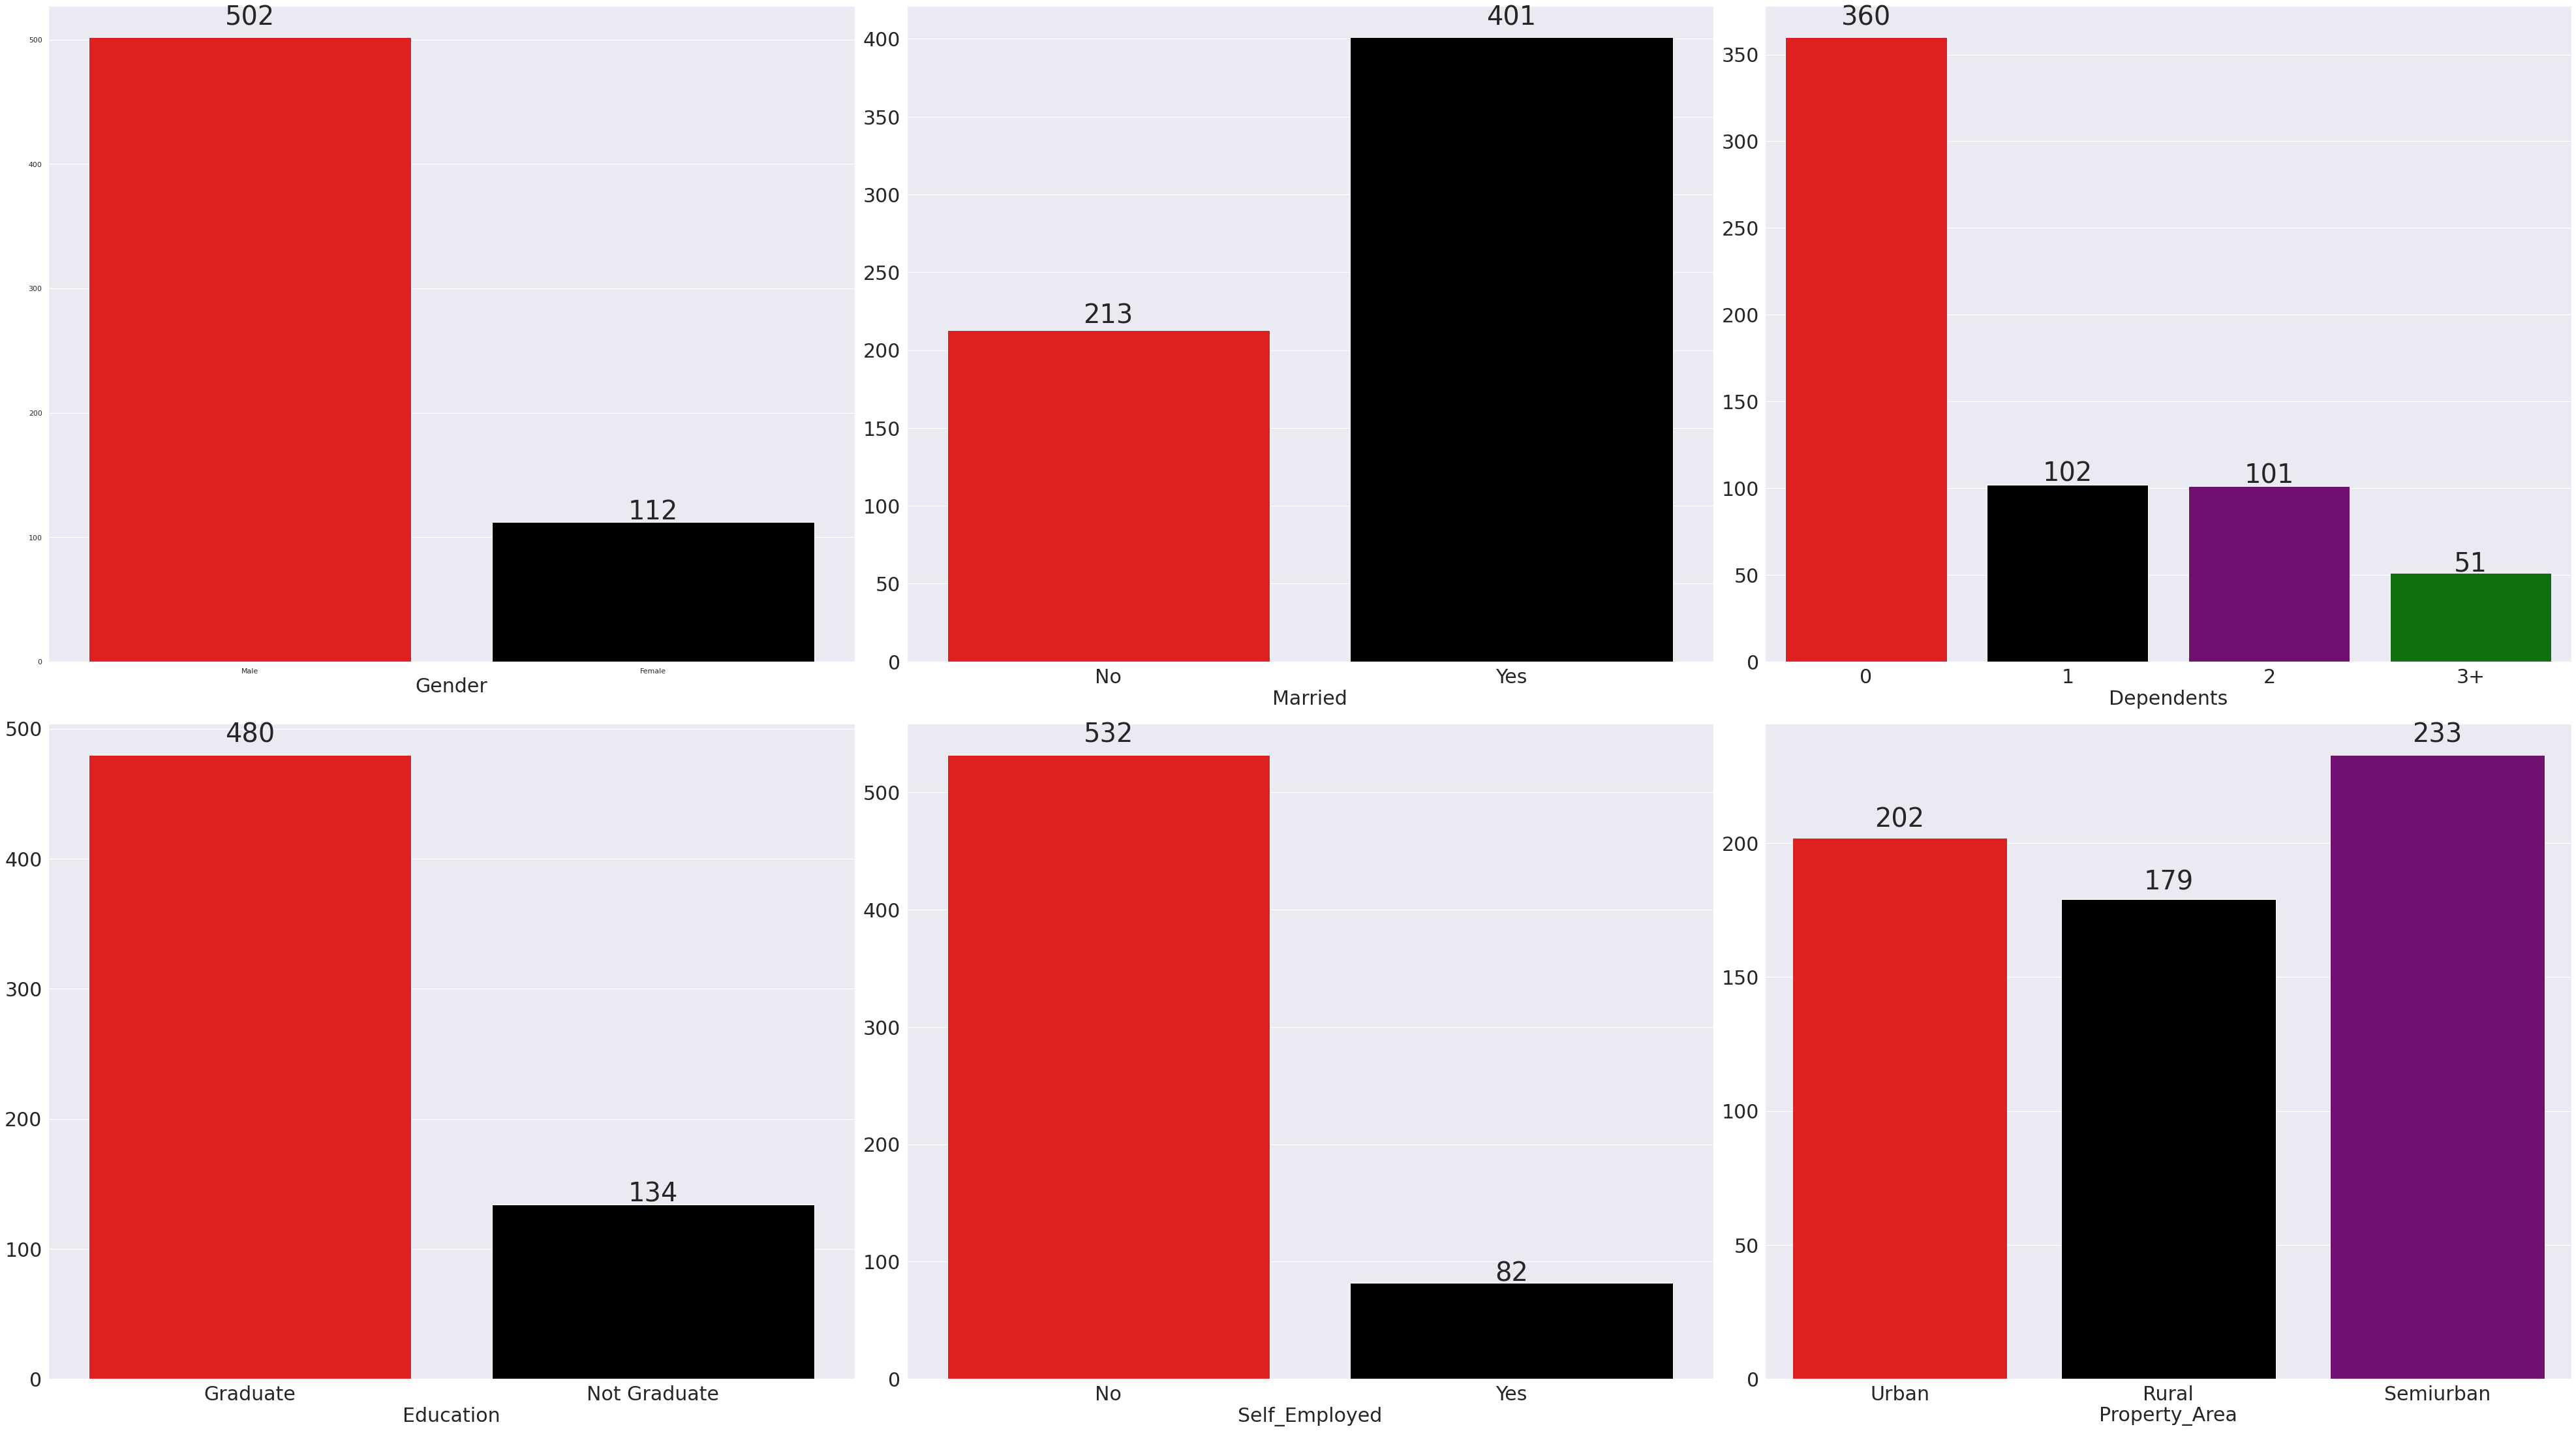

In [11]:
plt.figure(figsize = (55, 45))
plotnumber = 1

for column in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']:
    if plotnumber <= 6:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot( df[column], palette=['red','black','purple','green'])
        plt.xlabel(column, fontsize = 30)
        ax.set_xlabel(column, fontsize = 30)
        ax.set_ylabel('', fontsize = 30)
        plt.rc('xtick', labelsize=30)
        plt.rc('ytick', labelsize=30)
       

    for p in ax.patches:
     width = p.get_width()
     height = p.get_height()
     x, y = p.get_xy() 
     ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center',fontsize = 40)    
    plotnumber += 1
    
plt.tight_layout()
plt.show()

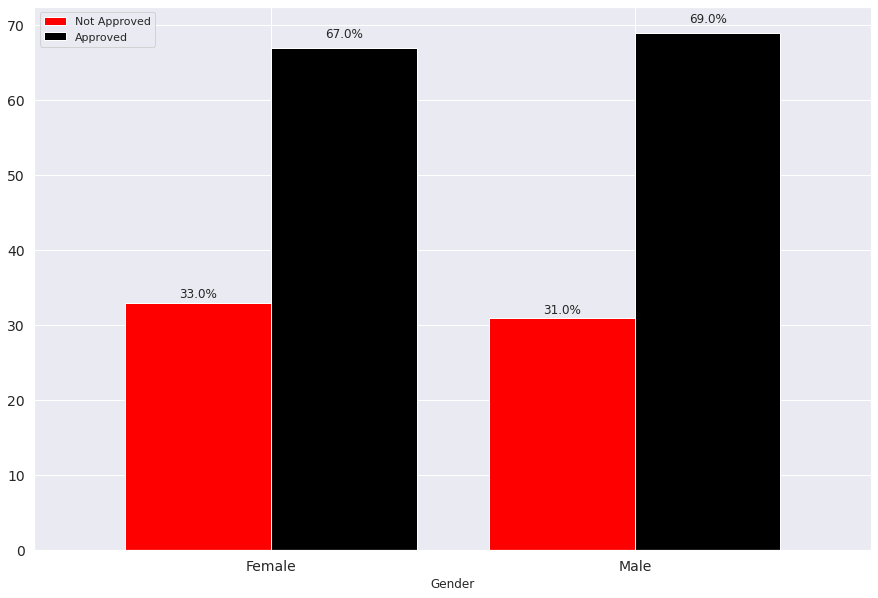

In [12]:
colors_list = ['red','black']
ax = (round(pd.crosstab(df.Gender, df.Loan_Status,normalize='index'),2) * 100).plot(kind='bar', width=0.8, color=colors_list, edgecolor=None)
plt.xticks(fontsize=14,rotation = 0)
plt.yticks(fontsize=14,rotation = 0)
ax.set_ylabel('')
labels = ['Not Approved','Approved']
plt.legend(labels=labels)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

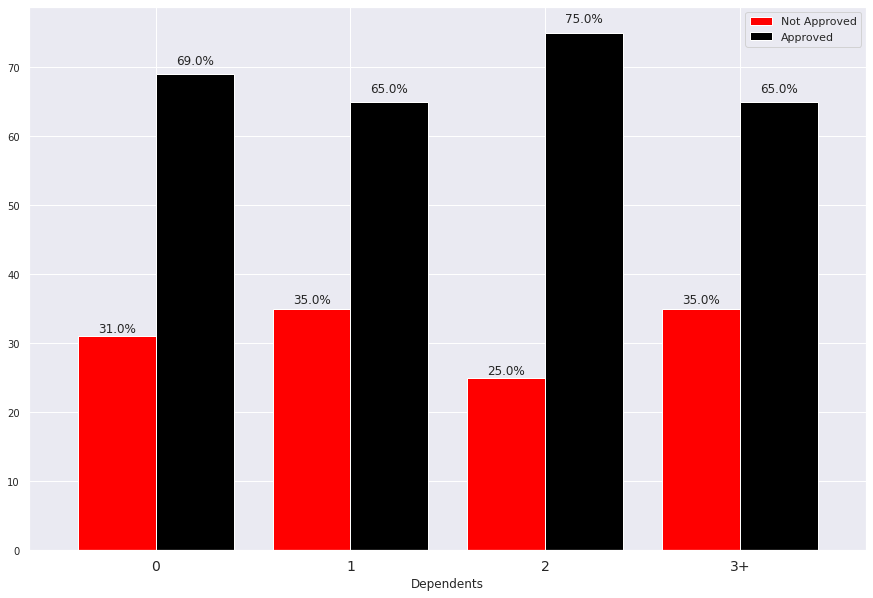

In [13]:
colors_list = ['red','black']
ax = (round(pd.crosstab(df.Dependents, df.Loan_Status,normalize='index'),2) * 100).plot(kind='bar', width=0.8, color=colors_list, edgecolor=None)
plt.xticks(fontsize=14,rotation = 0)
ax.set_ylabel('')
labels = ['Not Approved','Approved']
plt.legend(labels=labels)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

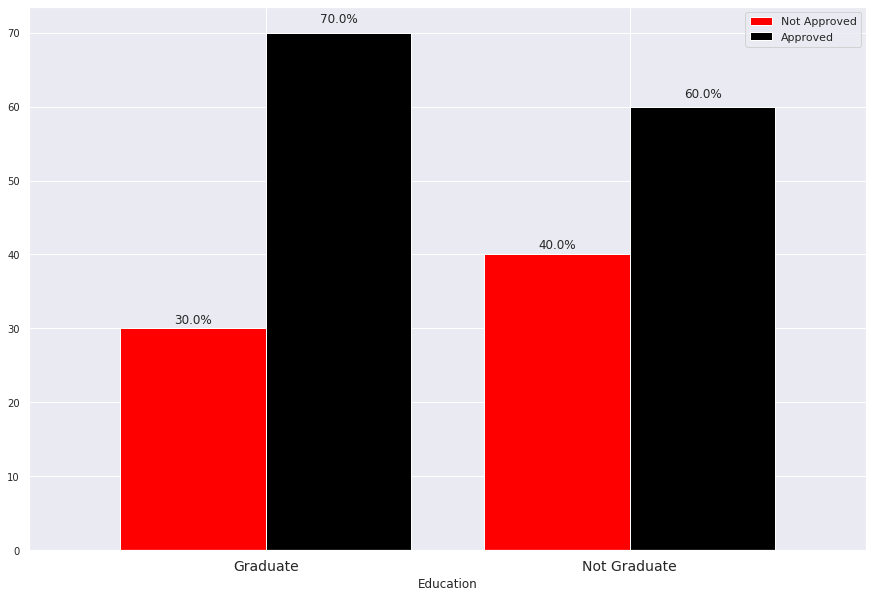

In [14]:
colors_list = ['red','black']
ax = (round(pd.crosstab(df.Education, df.Loan_Status,normalize='index'),1) * 100).plot(kind='bar', width=0.8, color=colors_list, edgecolor=None)
plt.xticks(fontsize=14,rotation = 0)
ax.set_ylabel('')
labels = ['Not Approved','Approved']
plt.legend(labels=labels)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

In [15]:
table = df[['Loan_Status','Gender','Married']]
table['Married'] = table['Married'].apply(lambda x : 'Married' if x =='Yes' else 'Not Married')
table['Loan_Status'] = table['Loan_Status'].apply(lambda x : 'Yes' if x == 'Y' else 'No')

In [16]:
table.head(3)

,Loan_Status,Gender,Married
0,Yes,Male,Not Married
1,No,Male,Married
2,Yes,Male,Married


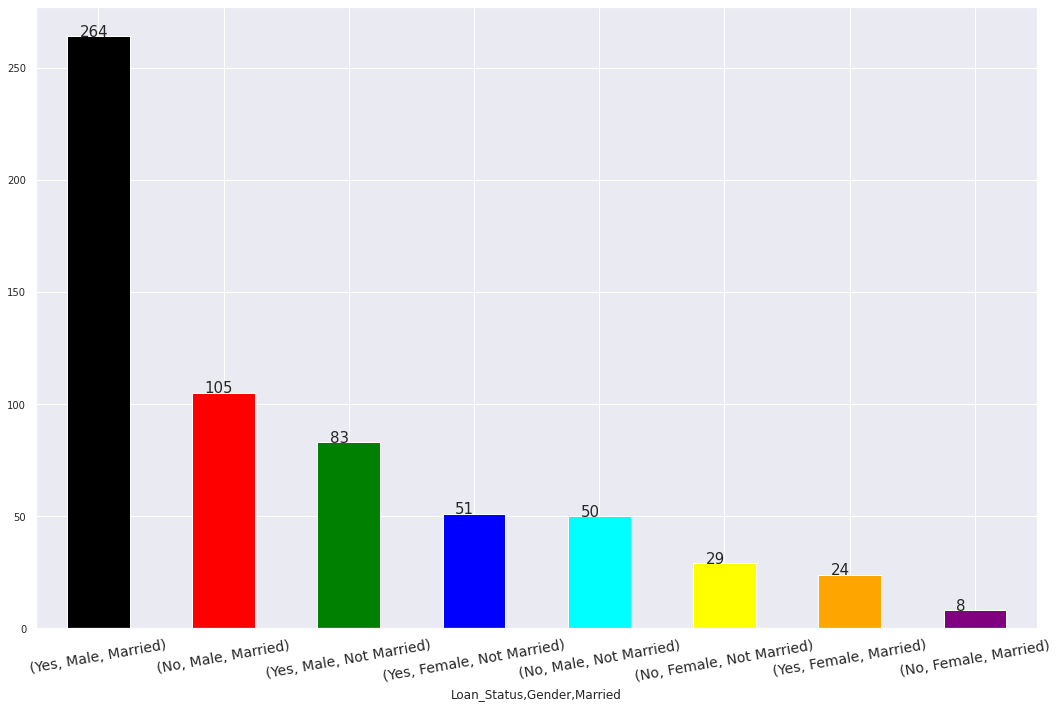

In [17]:
ax = table[['Loan_Status','Gender','Married']].value_counts().plot(kind="bar", figsize=[15, 10] ,color =['black', 'red', 'green', 'blue', 'cyan','yellow','orange','purple'])
plt.xticks(rotation=10, horizontalalignment="center", fontsize=14)
plt.ylabel("", fontsize=16)
for p in ax.patches:
    ax.annotate(
        str(p.get_height()), xy=(p.get_x() + 0.10, p.get_height() + 0.1), fontsize=15)
plt.tight_layout()
plt.show()

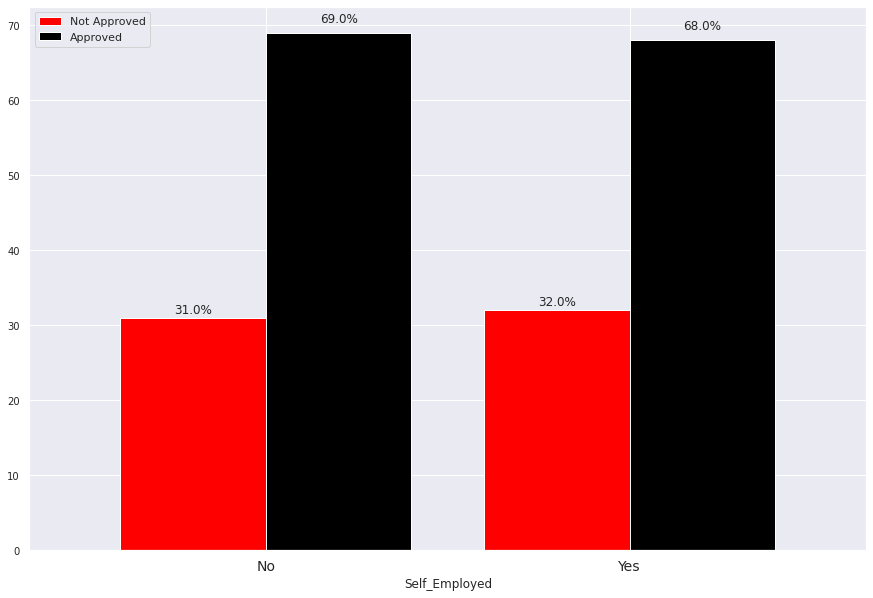

In [18]:
colors_list = ['red','black']
ax = (round(pd.crosstab(df.Self_Employed, df.Loan_Status,normalize='index'),2) * 100).plot(kind='bar', width=0.8, color=colors_list, edgecolor=None)
plt.xticks(fontsize=14,rotation = 0)
ax.set_ylabel('')
labels = ['Not Approved','Approved']
plt.legend(labels=labels)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

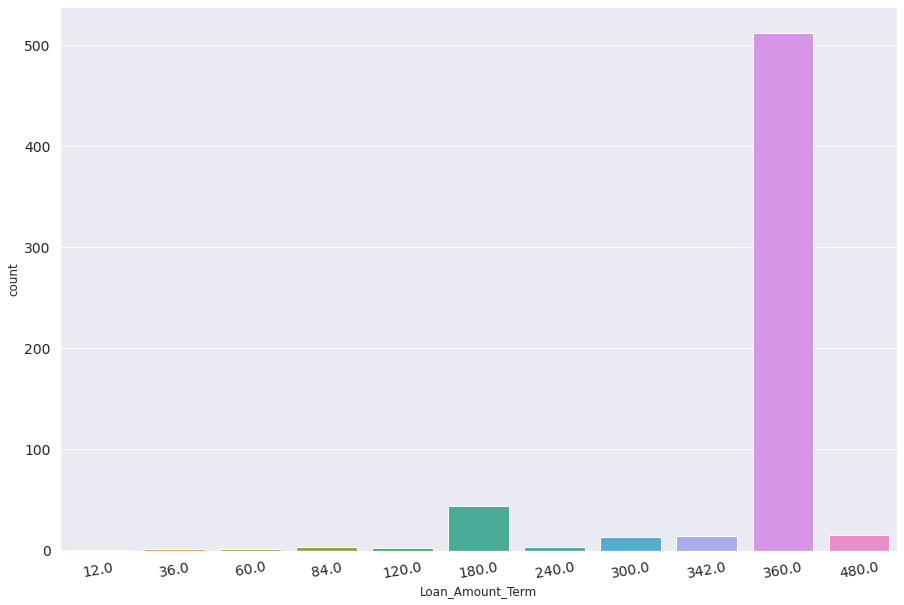

In [19]:
sns.countplot (df.Loan_Amount_Term)
plt.xticks(fontsize=14,rotation = 0)
plt.yticks(fontsize=14,rotation = 0)
plt.xticks(rotation = 10 )
plt.show()

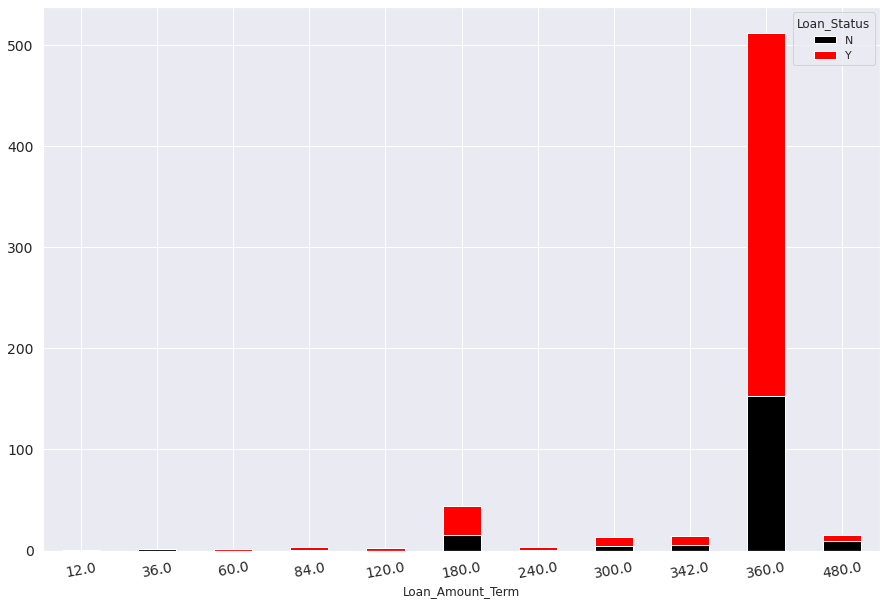

In [20]:
pd.crosstab (df.Loan_Amount_Term,df.Loan_Status).plot (kind ='bar', stacked =True,color =['black', 'red'])
plt.xticks(fontsize=14,rotation = 0)
plt.yticks(fontsize=14,rotation = 0)
plt.xticks(rotation = 10 )
plt.show()

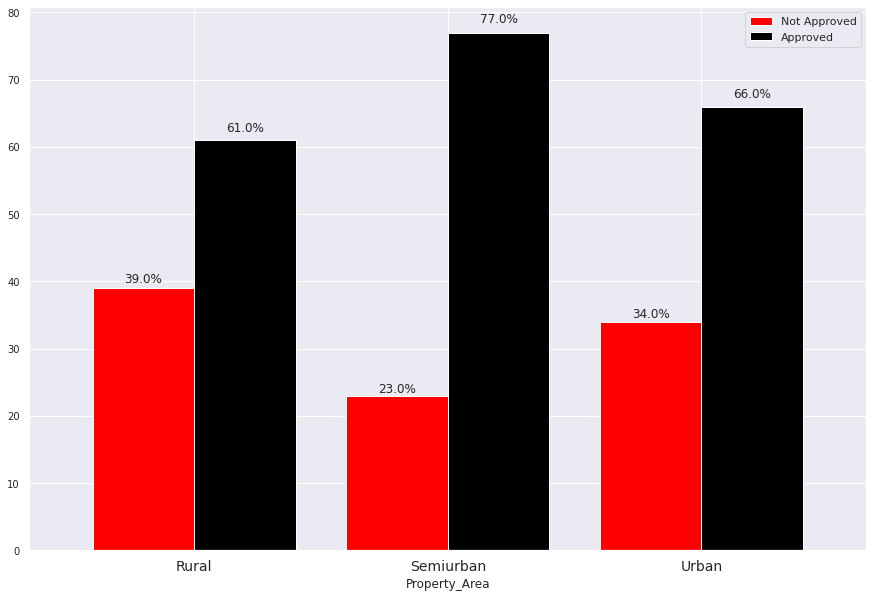

In [21]:
colors_list = ['red','black']
ax = (round(pd.crosstab(df.Property_Area, df.Loan_Status,normalize='index'),2) * 100).plot(kind='bar', width=0.8, color=colors_list, edgecolor=None)
plt.xticks(fontsize=14,rotation = 0)
ax.set_ylabel('')
labels = ['Not Approved','Approved']
plt.legend(labels=labels)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

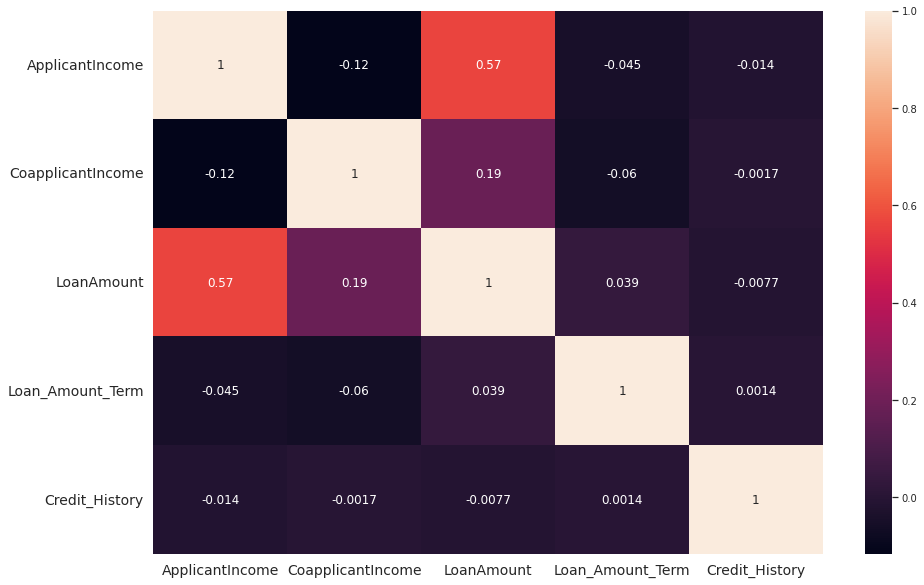

In [22]:
sns.heatmap (df.corr(), annot = True)
plt.xticks(fontsize=14,rotation = 0)
plt.yticks(fontsize=14,rotation = 0)

In [23]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
cols = ['Loan_ID','CoapplicantIncome']
df = df.drop(columns = cols , axis = 1)

In [25]:
df = pd.get_dummies(df)

In [26]:
df.sample(5)

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
433,2425,143.0,360.0,1.000000,0,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
436,1926,50.0,360.0,1.000000,0,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
156,6000,160.0,360.0,0.842199,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
595,3833,110.0,360.0,1.000000,0,1,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1
548,5000,103.0,360.0,0.000000,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0


In [27]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [28]:
df.sample(5)

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
139,4200,129.0,360.0,1.0,1,1,0,0,1,0,0,0,1,0,0,0
250,1668,201.0,360.0,0.0,1,1,1,0,0,0,0,0,0,1,0,0
293,5417,143.0,480.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0
508,2479,188.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
304,4000,140.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,1


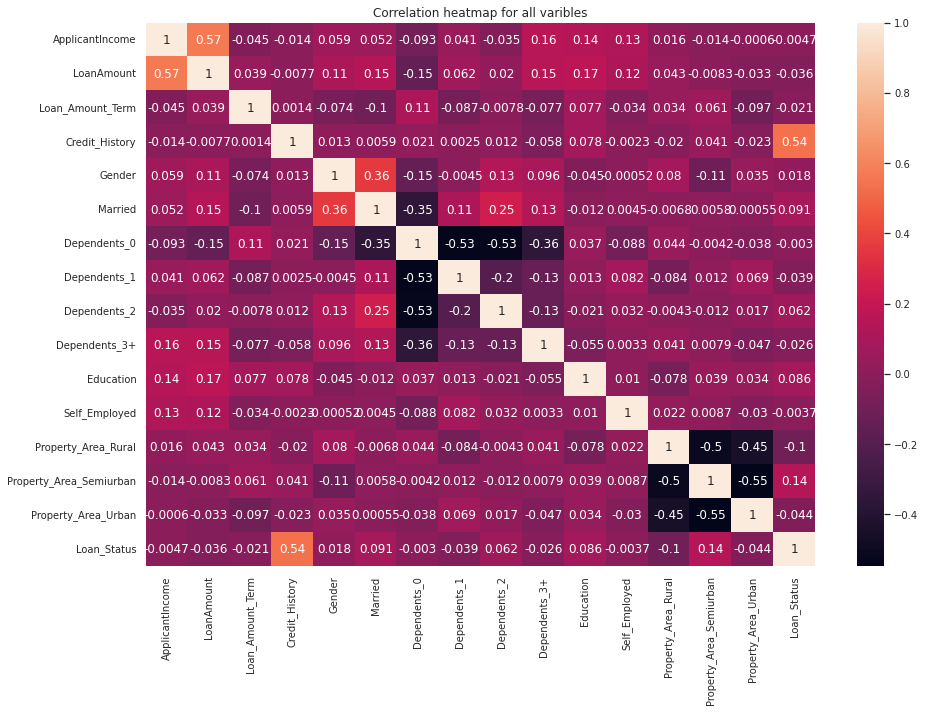

In [29]:
plt.title('Correlation heatmap for all varibles')
sns.heatmap (df.corr(), annot = True)

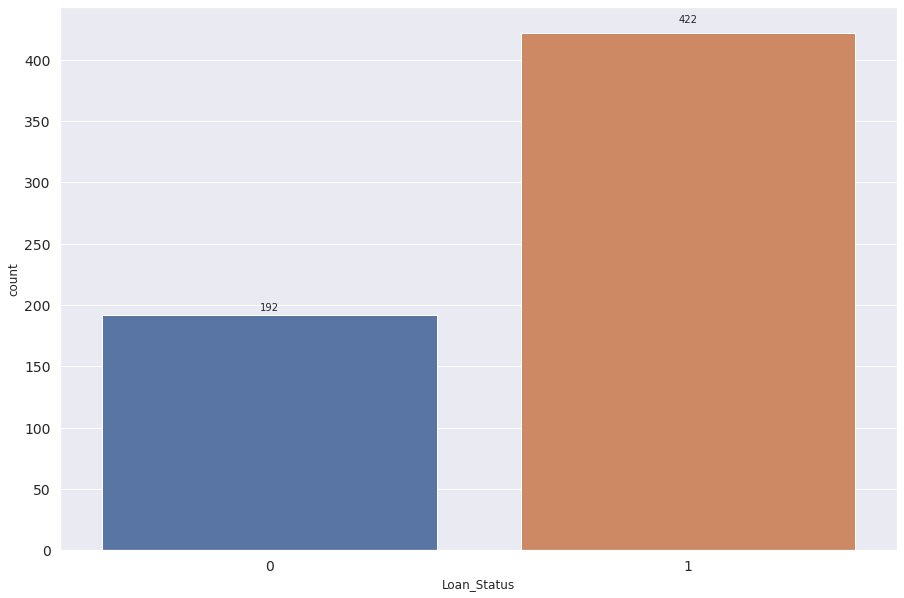

In [30]:
ax = sns.countplot (df.Loan_Status)
plt.xticks(fontsize=14,rotation = 0)
plt.yticks(fontsize=14,rotation = 0)

for p in ax.patches:
     width = p.get_width()
     height = p.get_height()
     x, y = p.get_xy() 
     ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center',fontsize = 10)

In [31]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

**Here is the most correlated variables sorting by ascending order**

In [32]:
for index,value in sol.items():
  if index[0] == 'Loan_Status' or index[1] =='Loan_Status':
    print(index,value)

('Credit_History', 'Loan_Status') 0.5404832126453117
('Property_Area_Semiurban', 'Loan_Status') 0.13654043156824347
('Property_Area_Rural', 'Loan_Status') 0.10069395890300738
('Married', 'Loan_Status') 0.09147782473606048
('Education', 'Loan_Status') 0.08588391467536527
('Dependents_2', 'Loan_Status') 0.06238355212613218
('Property_Area_Urban', 'Loan_Status') 0.043620882634419635
('Dependents_1', 'Loan_Status') 0.03873991242116089
('LoanAmount', 'Loan_Status') 0.03641600997237054
('Dependents_3+', 'Loan_Status') 0.0261230823694281
('Loan_Amount_Term', 'Loan_Status') 0.02097384400920136
('Gender', 'Loan_Status') 0.017986678707032164
('ApplicantIncome', 'Loan_Status') 0.0047095226593515584
('Self_Employed', 'Loan_Status') 0.003700437714982093
('Dependents_0', 'Loan_Status') 0.0030438716995576007


In [33]:
df.head(3)

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1


In [34]:
X = df.drop(columns = ['Loan_Status'],axis =1)

In [35]:
y=df.Loan_Status

In [36]:
X.shape,y.shape

((614, 15), (614,))



Our dataset is imbalanced so we could us **SMOTE** technique





In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
X, y = SMOTE().fit_resample(X, y)
X.shape , y.shape

((844, 15), (844,))

In [39]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=47)
X_train.shape,y_train.shape

((633, 15), (633,))

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

['scaledLR']: 0.838790 
['scaledLR', 'scaledKNN']: 0.805804 
['scaledLR', 'scaledKNN', 'scaledDT']: 0.775818 
['scaledLR', 'scaledKNN', 'scaledDT', 'scaledSVC']: 0.841989 
['scaledLR', 'scaledKNN', 'scaledDT', 'scaledSVC', 'scaledMNB']: 0.786632 


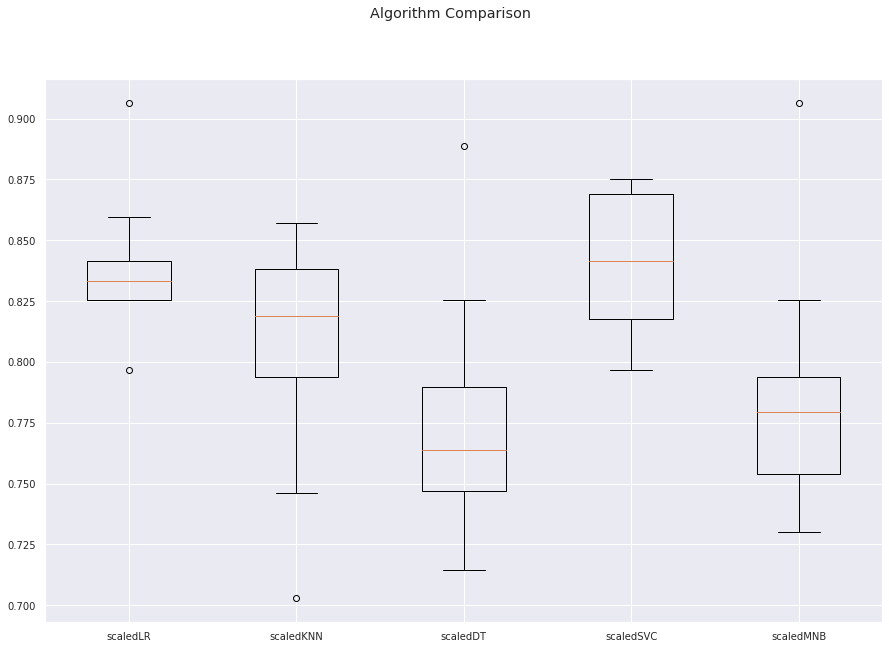

In [41]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , MinMaxScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , MinMaxScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , MinMaxScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledSVC' , (Pipeline([('scaled' , MinMaxScaler()),('SVC' ,SVC())]))))
pipelines.append(('scaledMNB' , (Pipeline([('scaled' , MinMaxScaler()),('MNB' ,GaussianNB())]))))

model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='accuracy')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f " % (model_name, crossv_results.mean())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
X = MinMaxScaler().fit_transform(X)
X.shape, y.shape

((844, 15), (844,))

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=47)
X_train.shape,y_train.shape

((633, 15), (633,))

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.8530805687203792

In [46]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred_smote = model.predict (X_test)

In [47]:
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred_smote,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

LR accuracy: 85.31%


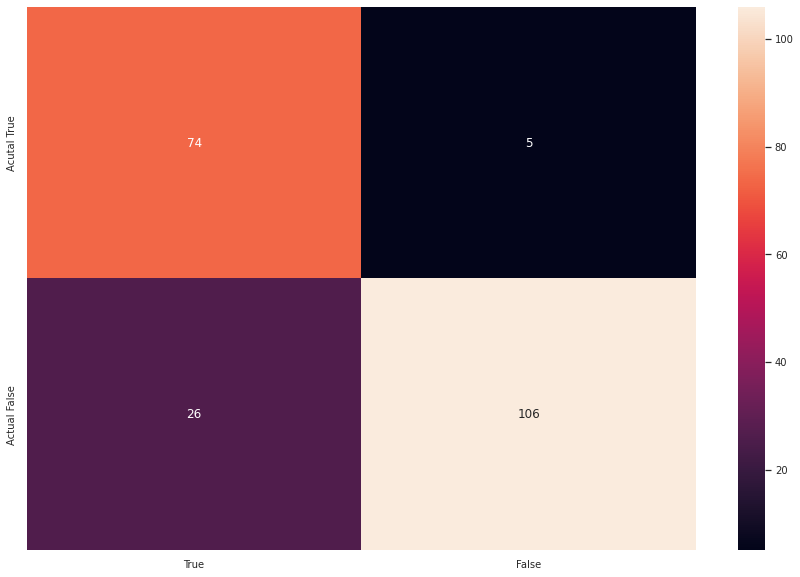

In [48]:
data= confusion_matrix (y_pred_smote, y_test)
cm =pd.DataFrame (data, columns =['True', 'False'], index = ['Acutal True', 'Actual False'])
cm
sns.heatmap (cm, annot =True,fmt='d')
plt.show()

In [49]:
model.predict([[5849,146,360,1,1,0,1,0,0,0,1,0,0,0,1]])

array([1], dtype=uint8)

In [50]:
df.head(1)

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
